In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
import matplotlib.pyplot as plt

In [2]:
def random_color():
        rand = lambda: random.randint(0, 255)
        return '#%02X%02X%02X' % (rand(), rand(), rand())

In [3]:
df = pd.read_csv("Adderall_comments.csv")


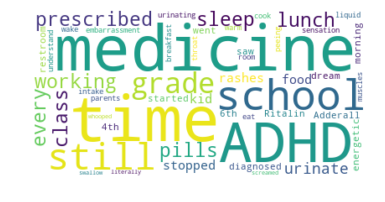

In [4]:
text = df.comments[0]
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [5]:
all_text = " ".join(comm for comm in df.comments)
print ("There are {} words in the combination of all comments."
      .format(len(all_text)))

There are 439471 words in the combination of all comments.


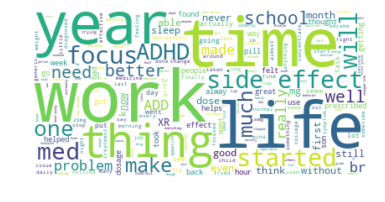

In [11]:
stopwords = set(STOPWORDS)
stopwords.update(["Adderall","feel","day","take","drug","medication","doctor","mecication","help","taking","now"])

wordcloud = WordCloud(stopwords= stopwords, background_color = "white").generate(all_text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig("reviews.png")

In [13]:
import re

In [14]:
df['user info'][0]

'Reviewer: Hurt, 25-34 Male  on Treatment for 5 to less than 10 years (Patient) '

In [15]:
gender = []
ages = []
for line in df["user info"]:
    comma_age = re.search("(?<=,\s)\d[^\s]+",line)
    age = re.search("\d[^\s]+",line)
    if comma_age is not None:
        ages.append(comma_age.group())
    elif age is not None:
        ages.append(age.group())
    else:
        ages.append(np.nan)
    male = re.search("(?:Male)",line)
    female = re.search("(?:Female)",line)
    if male is not None:
        gender.append(male.group())
    elif female is not None:
        gender.append(female.group())
    else:
        gender.append(np.nan)


In [16]:
df['Age']= ages
df['Gender'] = gender

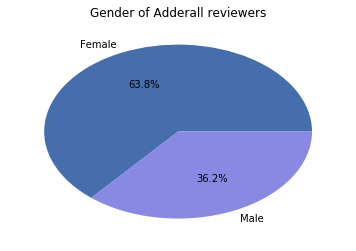

In [18]:
plt.pie(df.Gender.value_counts(),labels=df.Gender.value_counts().keys(), colors = [random_color(),random_color()],
            autopct='%.1f%%')
plt.title("Gender of Adderall reviewers")
plt.savefig("gender.png")

In [20]:
df.loc[[406,604],['Age']]=np.nan

In [21]:
df.loc[[755],['Age']]=np.nan

In [22]:
df.loc[[441],['Age']]='75 or over'

In [23]:
reviewer = []
for line in df["user info"]:
    patient = re.search("(?:Patient)",line)
    caregiver = re.search("(?:Caregiver)",line)
    if patient is not None:
        reviewer.append(patient.group())
    elif caregiver is not None:
        reviewer.append(caregiver.group())
    else:
        reviewer.append(np.nan)
df['reviewer_type'] = reviewer
    

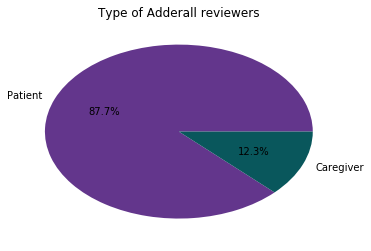

In [24]:
plt.pie(df.reviewer_type.value_counts(),labels=df.reviewer_type.value_counts().keys(), 
        colors = [random_color(),random_color()],autopct='%.1f%%')
plt.title("Type of Adderall reviewers")
plt.savefig("type.png")

In [25]:
df.Age.value_counts()

25-34         260
35-44         206
45-54         186
19-24         170
55-64         119
13-18          89
7-12           34
3-6            26
65-74          26
75 or over      1
Name: Age, dtype: int64

In [26]:
df.Age = pd.Categorical(df.Age, 
                        categories=["3-6", "7-12", "13-18", "19-24", "25-34", "35-44", 
                                    "45-54", "55-64", "65-74","75 or over"], 
                        ordered=True)


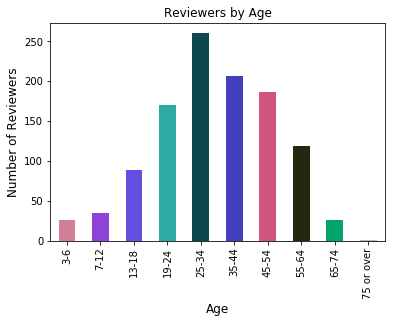

In [27]:
ax = df['Age'].value_counts(sort=False).plot(kind = 'bar',
                                           title = 'Reviewers by Age',
                                           color = [random_color() for i in df.Age.value_counts()],
                                          )
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Number of Reviewers", fontsize=12)
plt.savefig("rev_age.png")

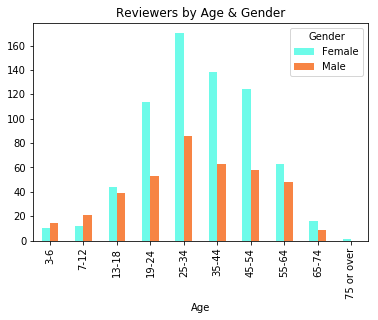

In [41]:
pd.crosstab(df['Age'],df['Gender']).plot.bar(color = [random_color(), random_color()], title = "Reviewers by Age & Gender")
plt.savefig("age_gen.png")
